In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Data = pd.read_csv("train.csv")

In [22]:
Data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Salutation        0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          2
Cabin_Serial    687
Cabin           687
dtype: int64

In [19]:
Data.dtypes

PassengerId       int64
Survived          int64
Pclass           object
Salutation       object
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
Cabin_Serial     object
Cabin            object
dtype: object

# Frequent Category Imputation

In [77]:
DataFrame = Data.copy()

In [14]:
len(DataFrame['Cabin'].unique())

148

In [15]:
len(DataFrame['Cabin_Serial'].unique())

9

In [23]:
len(DataFrame['Embarked'].unique())

4

In [34]:
print("Number of Categories in: ")
for ColName in DataFrame[['Embarked','Cabin_Serial','Cabin']]:
    print("{} = {}".format(ColName, len(DataFrame[ColName].unique())))

Number of Categories in: 
Embarked = 4
Cabin_Serial = 9
Cabin = 148


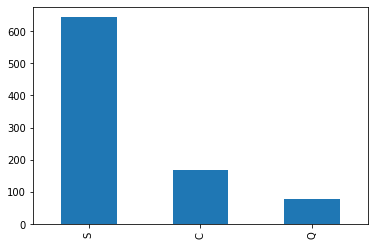

In [58]:
DataFrame['Embarked'].value_counts().plot.bar()

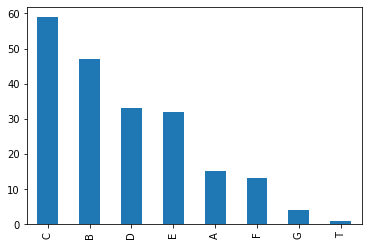

In [16]:
DataFrame['Cabin_Serial'].value_counts().plot.bar()

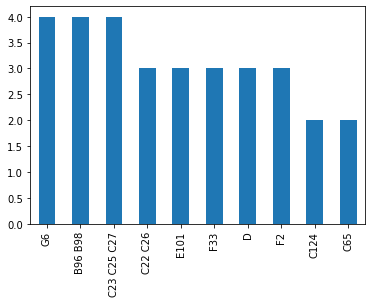

In [17]:
DataFrame['Cabin'].value_counts().head(10).plot.bar()

In [78]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
    most_frequent_category=DataFrame[ColName].mode()[0]
    # replace nan values with most occured category
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [79]:
for Columns in ['Embarked','Cabin_Serial','Cabin']:
    impute_nan_most_frequent_category(DataFrame,Columns)
    
DataFrame.head()

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Serial,Cabin,Embarked_Imputed,Cabin_Serial_Imputed,Cabin_Imputed
0,1,0,Third,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN,S,C,B96 B98
1,2,1,First,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C85,C,C,C85
2,3,1,Third,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,S,C,B96 B98
3,4,1,First,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,C123,S,C,C123
4,5,0,Third,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN,S,C,B96 B98


In [82]:
DataFrame[['Embarked','Embarked_Imputed','Cabin_Serial','Cabin_Serial_Imputed','Cabin','Cabin_Imputed']].head(10)

,Embarked,Embarked_Imputed,Cabin_Serial,Cabin_Serial_Imputed,Cabin,Cabin_Imputed
0,S,S,NaN,C,NaN,B96 B98
1,C,C,C,C,C85,C85
2,S,S,NaN,C,NaN,B96 B98
3,S,S,C,C,C123,C123
4,S,S,NaN,C,NaN,B96 B98
5,Q,Q,NaN,C,NaN,B96 B98
6,S,S,E,E,E46,E46
7,S,S,NaN,C,NaN,B96 B98
8,S,S,NaN,C,NaN,B96 B98
9,C,C,NaN,C,NaN,B96 B98


In [84]:
DataFrame = DataFrame.drop(['Embarked','Cabin_Serial','Cabin'], axis = 1)

In [85]:
DataFrame

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Imputed,Cabin_Serial_Imputed,Cabin_Imputed
0,1,0,Third,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C,B96 B98
1,2,1,First,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C85
2,3,1,Third,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C,B96 B98
3,4,1,First,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,C123
4,5,0,Third,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C,B96 B98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,Mr,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,C,B96 B98
887,888,1,First,Miss,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B,B42
888,889,0,Third,Miss,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,C,B96 B98
889,890,1,First,Mr,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,C148


# Adding Vairable to Capture NAN Value

In [88]:
DataFrame = Data.copy()

In [89]:
DataFrame.head()

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Serial,Cabin
0,1,0,Third,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN
1,2,1,First,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C85
2,3,1,Third,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN
3,4,1,First,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,C123
4,5,0,Third,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN


In [92]:
# Function to impute most occured category and add importance vairable

def impute_nan_add_vairable(DataFrame,ColName):
    # Create new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"]=np.where(DataFrame[ColName].isnull(),1,0)
    
    #Take most frequent occured category in that vairable (.mode())
    Mode_Category = DataFrame[ColName].mode()[0]
    
    #Replace NAN values with most occured category in actual vairable
    DataFrame[ColName].fillna(Mode_Category,inplace=True)

In [93]:
for Columns in ['Embarked','Cabin_Serial','Cabin']:
    impute_nan_add_vairable(DataFrame,Columns)
    
DataFrame.head()

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Serial,Cabin,Embarked_Imputed,Cabin_Serial_Imputed,Cabin_Imputed
0,1,0,Third,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C,B96 B98,0,1,1
1,2,1,First,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C85,0,0,0
2,3,1,Third,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C,B96 B98,0,1,1
3,4,1,First,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,C123,0,0,0
4,5,0,Third,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C,B96 B98,0,1,1


In [94]:
DataFrame[['Embarked','Embarked_Imputed','Cabin_Serial','Cabin_Serial_Imputed','Cabin','Cabin_Imputed']].head(10)

,Embarked,Embarked_Imputed,Cabin_Serial,Cabin_Serial_Imputed,Cabin,Cabin_Imputed
0,S,0,C,1,B96 B98,1
1,C,0,C,0,C85,0
2,S,0,C,1,B96 B98,1
3,S,0,C,0,C123,0
4,S,0,C,1,B96 B98,1
5,Q,0,C,1,B96 B98,1
6,S,0,E,0,E46,0
7,S,0,C,1,B96 B98,1
8,S,0,C,1,B96 B98,1
9,C,0,C,1,B96 B98,1


# Create a New Category for NAN Values

In [104]:
DataFrame = Data.copy()

In [105]:
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
    DataFrame[ColName]=np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

In [106]:
## Call function to create new category for variables
for Columns in ['Embarked','Cabin_Serial','Cabin']:
    impute_nan_create_category(DataFrame,Columns)

In [107]:
#2. Display result
DataFrame[['Embarked','Cabin_Serial','Cabin']].head(10)

,Embarked,Cabin_Serial,Cabin
0,S,Unknown,Unknown
1,C,C,C85
2,S,Unknown,Unknown
3,S,C,C123
4,S,Unknown,Unknown
5,Q,Unknown,Unknown
6,S,E,E46
7,S,Unknown,Unknown
8,S,Unknown,Unknown
9,C,Unknown,Unknown
